__8. Using the data from Question 5, write code the analyze the data and answer the following questions__

__Note -__
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding__

__Insights to be drawn -__
* Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.
* Get all the episode names, whose average rating is more than 8 for every season
* Get all the episode names that aired before May 2019
* Get the episode name from each season with the highest and lowest rating
* Get the summary for the most popular ( ratings ) episode in every season


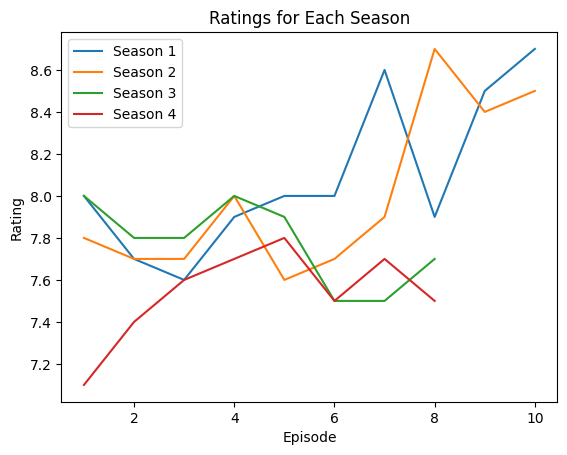

Episode names with average rating > 8 for each season:
Season 1: Trompe L'Oeil, The Well-Tempered Clavier, The Bicameral Mind
Season 2: Kiksuya, Vanishing Point, The Passenger

Episode names that aired before May 2019 for each season:
Season 1: The Original, Chestnut, The Stray, Dissonance Theory, Contrapasso, The Adversary, Trompe L'Oeil, Trace Decay, The Well-Tempered Clavier, The Bicameral Mind
Season 2: Journey Into Night, Reunion, Virtù e Fortuna, The Riddle of the Sphinx, Akane No Mai, Phase Space, Les Écorchés, Kiksuya, Vanishing Point, The Passenger

Episode name with the highest and lowest rating for each season:
Season 1: Highest - The Bicameral Mind (8.7), Lowest - The Stray (7.6)
Season 2: Highest - Kiksuya (8.7), Lowest - Akane No Mai (7.6)
Season 3: Highest - Parce Domine (8), Lowest - Decoherence (7.5)
Season 4: Highest - Zhuangzi (7.8), Lowest - The Auguries (7.1)

Summary for the most popular episode in each season:
Season 1: The Bicameral Mind (Rating: 8.7)
Summary: <

In [1]:
import requests
import matplotlib.pyplot as plt

# Make a GET request to the API endpoint
response = requests.get("https://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes")

# Check if the request was successful
if response.status_code == 200:
    data = response.json()  # Parse the response JSON data
    episodes = data["_embedded"]["episodes"]  # Get the list of episodes
    
    # Extract relevant information from the episodes
    seasons = {}
    episode_ratings = {}
    episode_names_high_ratings = {}
    episode_names_before_2019 = {}
    episode_names_highest_rating = {}
    episode_names_lowest_rating = {}
    episode_summaries_highest_rating = {}
    
    for episode in episodes:
        season = episode["season"]
        rating = episode["rating"]["average"]
        name = episode["name"]
        summary = episode["summary"]
        airdate = episode["airdate"]
        
        # Collect overall ratings for each season
        if season not in seasons:
            seasons[season] = []
        seasons[season].append(rating)
        
        # Collect episode names with average rating > 8 for every season
        if rating > 8:
            if season not in episode_names_high_ratings:
                episode_names_high_ratings[season] = []
            episode_names_high_ratings[season].append(name)
        
        # Collect episode names that aired before May 2019
        if airdate < "2019-05":
            if season not in episode_names_before_2019:
                episode_names_before_2019[season] = []
            episode_names_before_2019[season].append(name)
        
        # Collect episode names with the highest and lowest rating for each season
        if season not in episode_names_highest_rating or rating > episode_names_highest_rating[season][1]:
            episode_names_highest_rating[season] = (name, rating)
        
        if season not in episode_names_lowest_rating or rating < episode_names_lowest_rating[season][1]:
            episode_names_lowest_rating[season] = (name, rating)
        
        # Collect summaries for the most popular episode in each season
        if season not in episode_summaries_highest_rating or rating > episode_summaries_highest_rating[season][1]:
            episode_summaries_highest_rating[season] = (name, rating, summary)
    
    # Compare ratings for all seasons
    seasons_list = sorted(seasons.keys())  # Sort the seasons in ascending order
    season_ratings = [seasons[season] for season in seasons_list]
    
    # Plotting the ratings for all seasons
    for i, ratings in enumerate(season_ratings):
        plt.plot(range(1, len(ratings) + 1), ratings, label=f"Season {i + 1}")
    plt.xlabel("Episode")
    plt.ylabel("Rating")
    plt.title("Ratings for Each Season")
    plt.legend()
    plt.show()
    
    # Print the episode names with average rating > 8 for every season
    print("Episode names with average rating > 8 for each season:")
    for season, episode_names in episode_names_high_ratings.items():
        print(f"Season {season}: {', '.join(episode_names)}")
    
    # Print the episode names that aired before May 2019 for each season
    print("\nEpisode names that aired before May 2019 for each season:")
    for season, episode_names in episode_names_before_2019.items():
        print(f"Season {season}: {', '.join(episode_names)}")
    
    # Print the episode name with the highest and lowest rating for each season
    print("\nEpisode name with the highest and lowest rating for each season:")
    for season, (highest_name, highest_rating) in episode_names_highest_rating.items():
        lowest_name, lowest_rating = episode_names_lowest_rating[season]
        print(f"Season {season}: Highest - {highest_name} ({highest_rating}), Lowest - {lowest_name} ({lowest_rating})")
    
    # Print the summary for the most popular episode in each season
    print("\nSummary for the most popular episode in each season:")
    for season, (name, rating, summary) in episode_summaries_highest_rating.items():
        print(f"Season {season}: {name} (Rating: {rating})")
        print(f"Summary: {summary}")
        print("=" * 50)
else:
    print("Error occurred while retrieving data from the API.")
